# Data Science Job Postings on Glassdoor (Cleaned Dataset)

### Importing Dataset and Data Exploration

In [1]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
df <- read.csv("Cleaned_DS_Jobs.csv", header=TRUE)

head(df, 5)

Job.Title         Salary.Estimate
1 Sr Data Scientist 137-171        
2 Data Scientist    137-171        
3 Data Scientist    137-171        
4 Data Scientist    137-171        
5 Data Scientist    137-171        
  Job.Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [3]:
# Get the column names
column_names <- colnames(df)

# Print the column names
print(column_names)

 [1] "Job.Title"         "Salary.Estimate"   "Job.Description"  
 [4] "Rating"            "Company.Name"      "Location"         
 [7] "Headquarters"      "Size"              "Type.of.ownership"
[10] "Industry"          "Sector"            "Revenue"          
[13] "min_salary"        "max_salary"        "avg_salary"       
[16] "job_state"         "same_state"        "company_age"      
[19] "python"            "excel"             "hadoop"           
[22] "spark"             "aws"               "tableau"          
[25] "big_data"          "job_simp"          "seniority"        


In [4]:
# Hypothesized salary mean
hypothesized_mean <- 124

# Perform one-sample t-test
t_test_result <- t.test(df$avg_salary, mu = hypothesized_mean)

# Print the result
print(t_test_result)


	One Sample t-test

data:  df$avg_salary
t = -0.25046, df = 659, p-value = 0.8023
alternative hypothesis: true mean is not equal to 124
95 percent confidence interval:
 120.5711 126.6531
sample estimates:
mean of x 
 123.6121 



In [217]:
# Finding the number of people possessing Python skills
num_python_1s <- sum(df$python == 1)
num_python_1s

[1] 482

In [218]:
prop.test(482,660)


	1-sample proportions test with continuity correction

data:  482 out of 660, null probability 0.5
X-squared = 139.1, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.6944010 0.7634803
sample estimates:
       p 
0.730303 


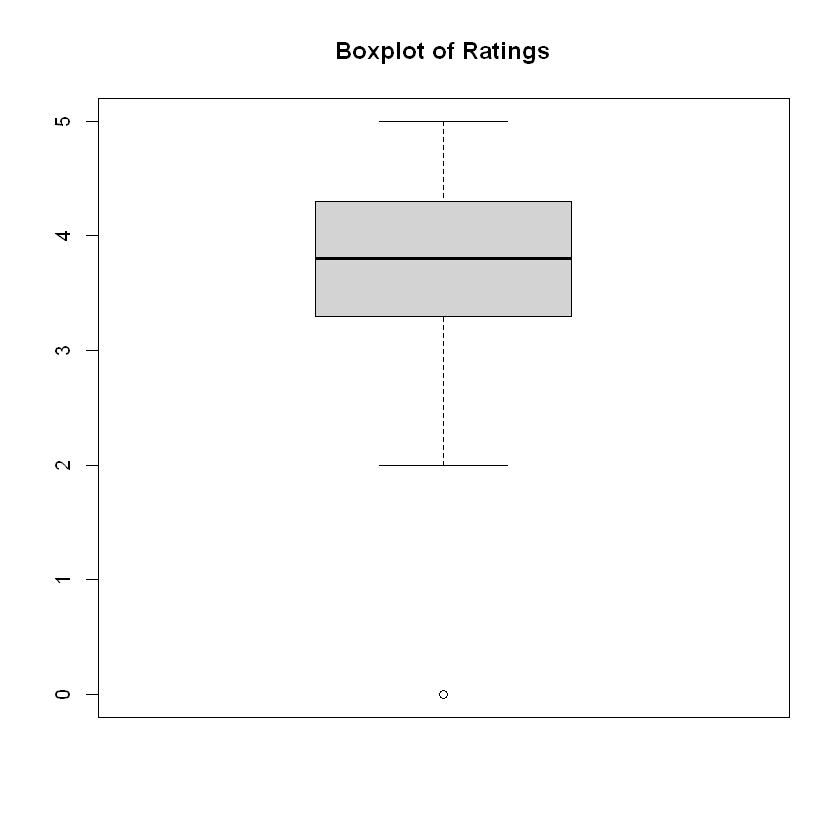

In [219]:
boxplot(df$Rating, main="Boxplot of Ratings")

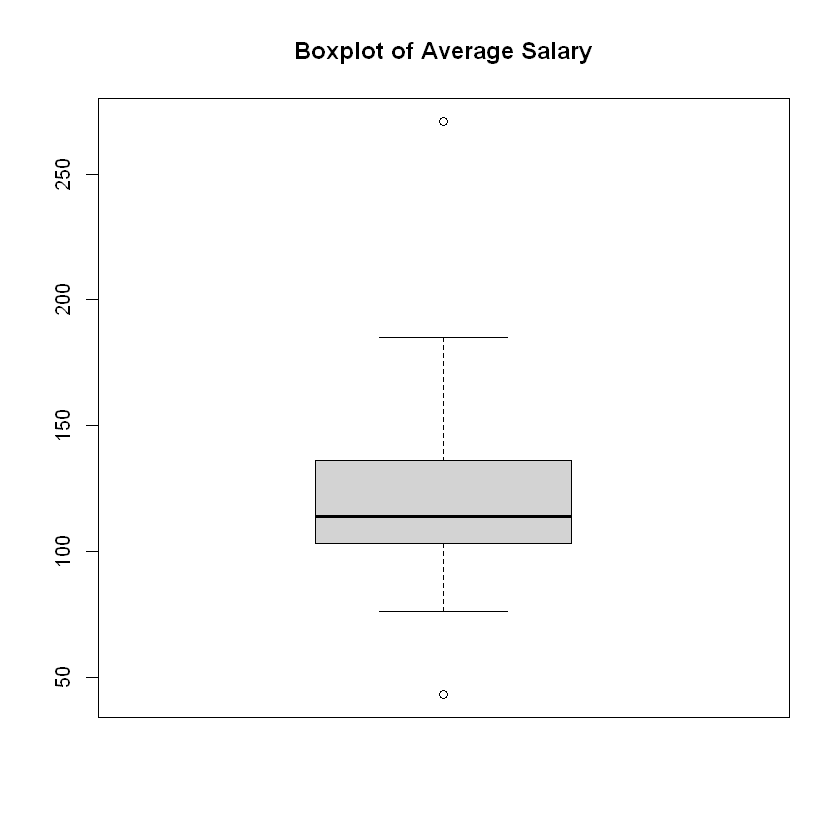

In [220]:
boxplot(df$avg_salary, main="Boxplot of Average Salary")

In [221]:
shapiro.test(df$min_salary)


	Shapiro-Wilk normality test

data:  df$min_salary
W = 0.90924, p-value < 2.2e-16


In [222]:
df_new <- df %>% select(-c("Salary.Estimate", "Job.Description", "Company.Name", "Industry", "Location", "Headquarters", "same_state"))

head(df_new, 5)

,Job.Title,Rating,Size,Type.of.ownership,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,Sr Data Scientist,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance,Unknown / Non-Applicable,137,171,154,NY,27,0,0,0,0,1,0,0,data scientist,senior
2,Data Scientist,4.2,5001 to 10000 employees,Company - Public,Business Services,$1 to $2 billion (USD),137,171,154,VA,52,0,0,1,0,0,0,1,data scientist,na
3,Data Scientist,3.8,1001 to 5000 employees,Private Practice / Firm,Business Services,$100 to $500 million (USD),137,171,154,MA,39,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,3.5,501 to 1000 employees,Company - Public,Manufacturing,$100 to $500 million (USD),137,171,154,MA,20,1,1,0,0,1,0,0,data scientist,na
5,Data Scientist,2.9,51 to 200 employees,Company - Private,Business Services,Unknown / Non-Applicable,137,171,154,NY,22,1,1,0,0,0,0,0,data scientist,na


In [223]:
dim(df_new)

[1] 660  20

In [224]:
summary(df_new)

  Job.Title             Rating          Size           Type.of.ownership 
 Length:660         Min.   :0.000   Length:660         Length:660        
 Class :character   1st Qu.:3.300   Class :character   Class :character  
 Mode  :character   Median :3.800   Mode  :character   Mode  :character  
                    Mean   :3.587                                        
                    3rd Qu.:4.300                                        
                    Max.   :5.000                                        
    Sector            Revenue            min_salary      max_salary   
 Length:660         Length:660         Min.   : 31.0   Min.   : 56.0  
 Class :character   Class :character   1st Qu.: 79.0   1st Qu.:119.0  
 Mode  :character   Mode  :character   Median : 91.0   Median :133.0  
                                       Mean   : 99.3   Mean   :148.3  
                                       3rd Qu.:122.0   3rd Qu.:165.0  
                                       Max.   :212.0   M

In [225]:
# Job Title
job_title <- as.data.frame(table(df_new$Job.Title))
job_title <- job_title[order(job_title$Freq, decreasing=TRUE), ]
job_title

,Var1,Freq
,<fct>,<int>
48,Data Scientist,333
33,Data Engineer,26
137,Senior Data Scientist,19
98,Machine Learning Engineer,14
26,Data Analyst,12
134,Senior Data Analyst,6
136,Senior Data Engineer,5
47,Data Science Software Engineer,4
57,Data Scientist - TS/SCI FSP or CI Required,4


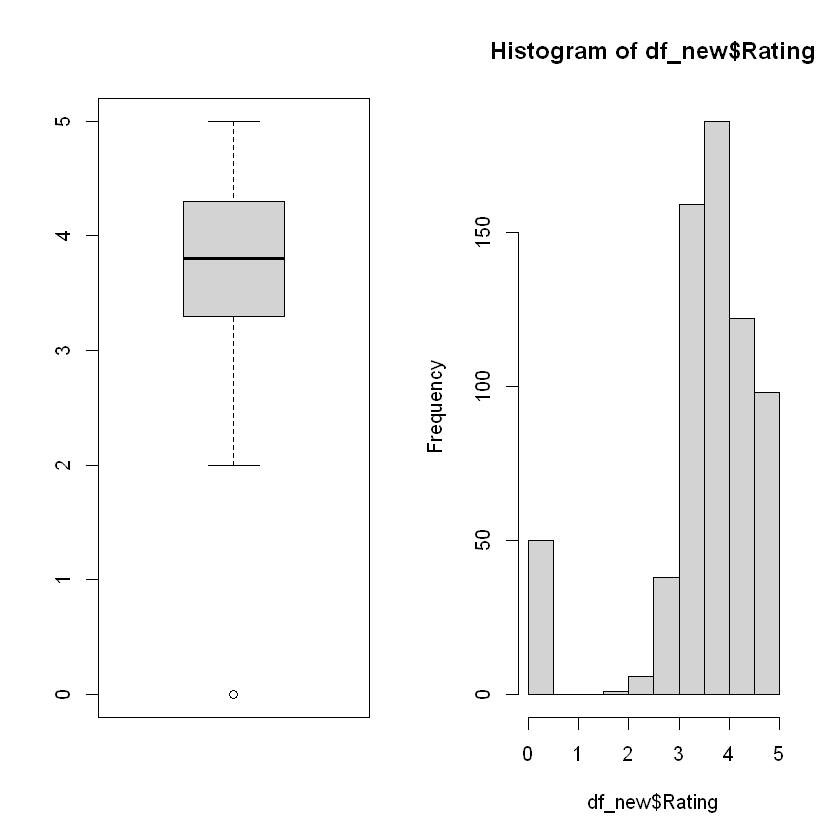

In [226]:
# Rating
par(mfrow=c(1, 2))
boxplot(df_new$Rating)
hist(df_new$Rating)

Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
"Outlier (-Inf) in boxplot 1 is not drawn"


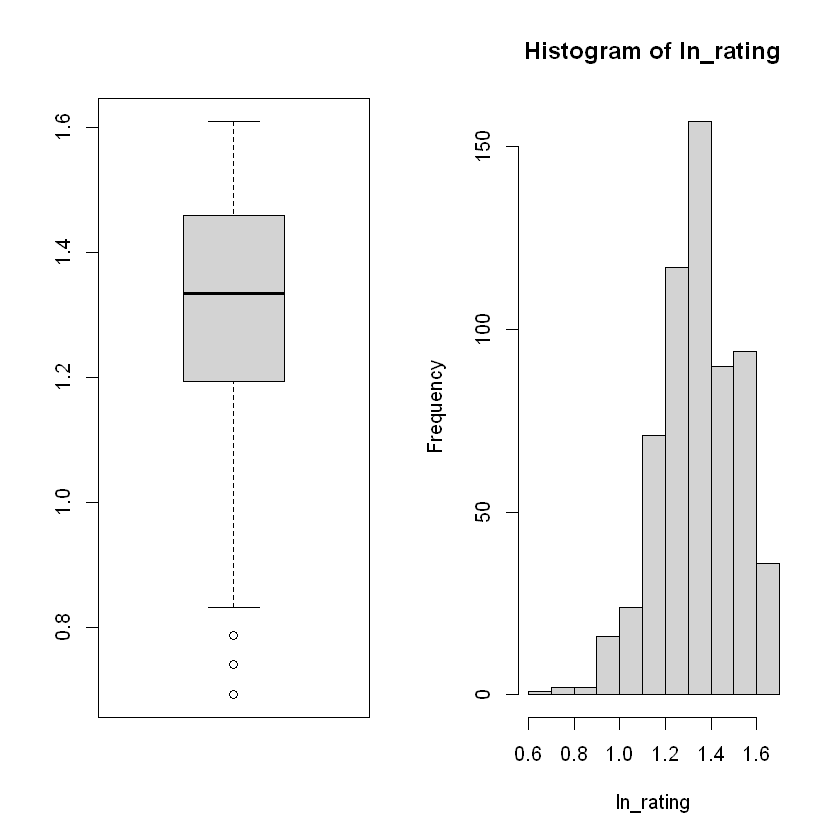

In [227]:
ln_rating <- log(df_new$Rating)
par(mfrow=c(1, 2))
boxplot(ln_rating)
hist(ln_rating)

In [228]:
# Company size
size <- as.data.frame(table(df_new$Size))
size <- size[order(size$Freq, decreasing=TRUE), ]
size

,Var1,Freq
,<fct>,<int>
8,51 to 200 employees,128
4,1001 to 5000 employees,104
2,1 to 50 employees,84
5,201 to 500 employees,83
3,10000+ employees,79
7,501 to 1000 employees,77
6,5001 to 10000 employees,61
1,-1,27
9,Unknown,17


In [229]:
size <- size[size$Var1!=-1 & size$Var1!="Unknown", ]
size

,Var1,Freq
,<fct>,<int>
8,51 to 200 employees,128
4,1001 to 5000 employees,104
2,1 to 50 employees,84
5,201 to 500 employees,83
3,10000+ employees,79
7,501 to 1000 employees,77
6,5001 to 10000 employees,61


In [230]:
# Type of ownership
owner <- as.data.frame(table(df_new$Type.of.ownership))
owner <- owner[order(owner$Freq, decreasing=TRUE), ]
owner

,Var1,Freq
,<fct>,<int>
3,Company - Private,386
4,Company - Public,152
8,Nonprofit Organization,36
12,Subsidiary or Business Segment,28
1,-1,27
6,Government,10
9,Other Organization,5
10,Private Practice / Firm,4
13,Unknown,4


In [231]:
# Sector
sector <- as.data.frame(table(df_new$Sector))
sector <- sector[order(sector$Freq, decreasing=TRUE), ]
sector

,Var1,Freq
,<fct>,<int>
13,Information Technology,178
6,Business Services,120
1,-1,71
5,Biotech & Pharmaceuticals,66
3,Aerospace & Defense,46
14,Insurance,32
10,Finance,31
15,Manufacturing,23
12,Health Care,21


In [232]:
# Revenue
revenue <- as.data.frame(table(df_new$Revenue))
revenue <- revenue[order(revenue$Freq, decreasing=TRUE), ]
revenue

,Var1,Freq
,<fct>,<int>
14,Unknown / Non-Applicable,206
6,$100 to $500 million (USD),94
5,$10+ billion (USD),62
7,$2 to $5 billion (USD),45
4,$10 to $25 million (USD),40
2,$1 to $2 billion (USD),36
8,$25 to $50 million (USD),35
3,$1 to $5 million (USD),31
11,$50 to $100 million (USD),31


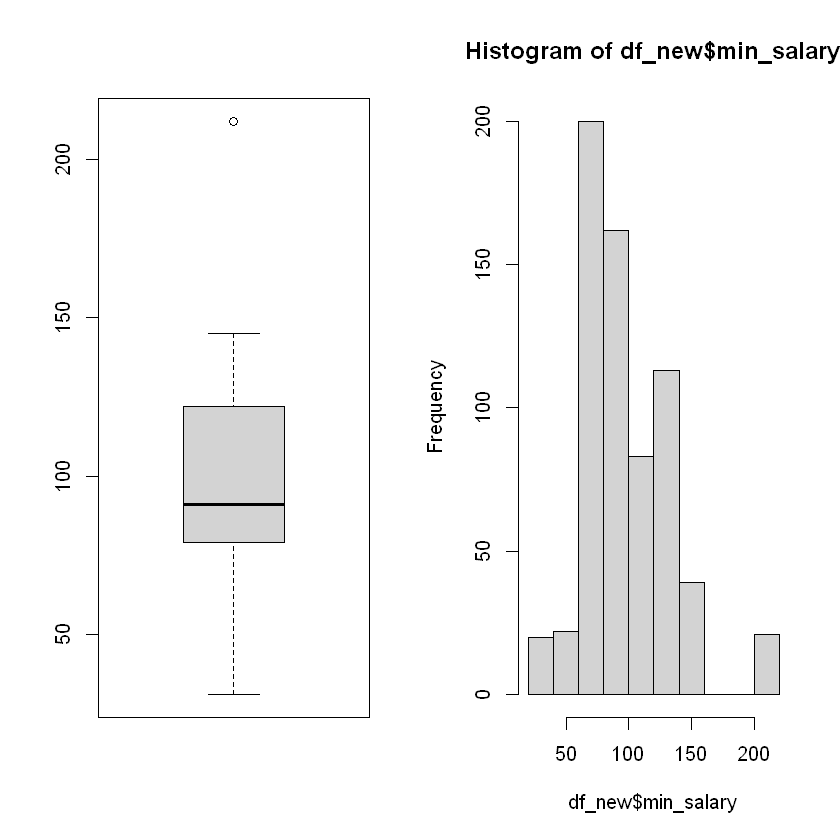

In [233]:
# Min Salary
par(mfrow=c(1, 2))
boxplot(df_new$min_salary)
hist(df_new$min_salary)

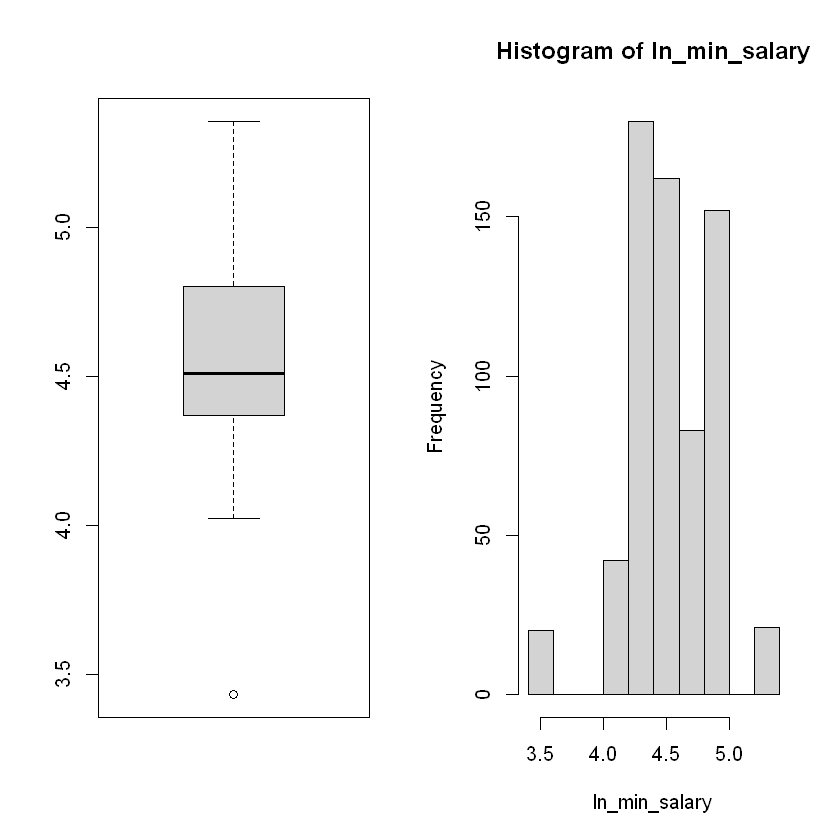

In [234]:
ln_min_salary <- log(df_new$min_salary)
par(mfrow=c(1, 2))
boxplot(ln_min_salary)
hist(ln_min_salary)

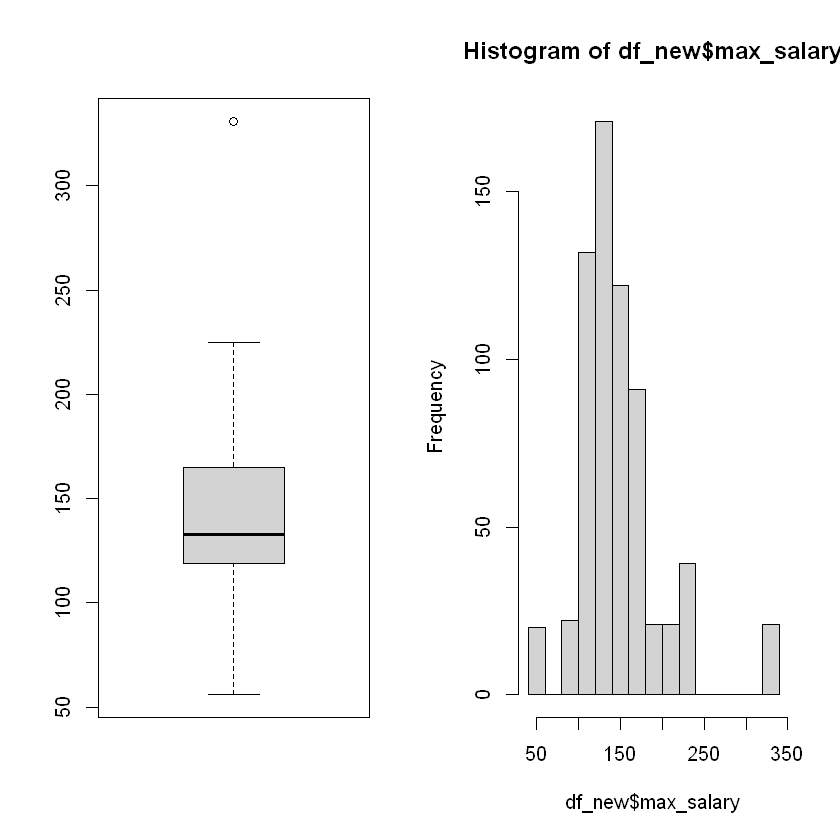

In [235]:
# Max Salary
par(mfrow=c(1, 2))
boxplot(df_new$max_salary)
hist(df_new$max_salary)

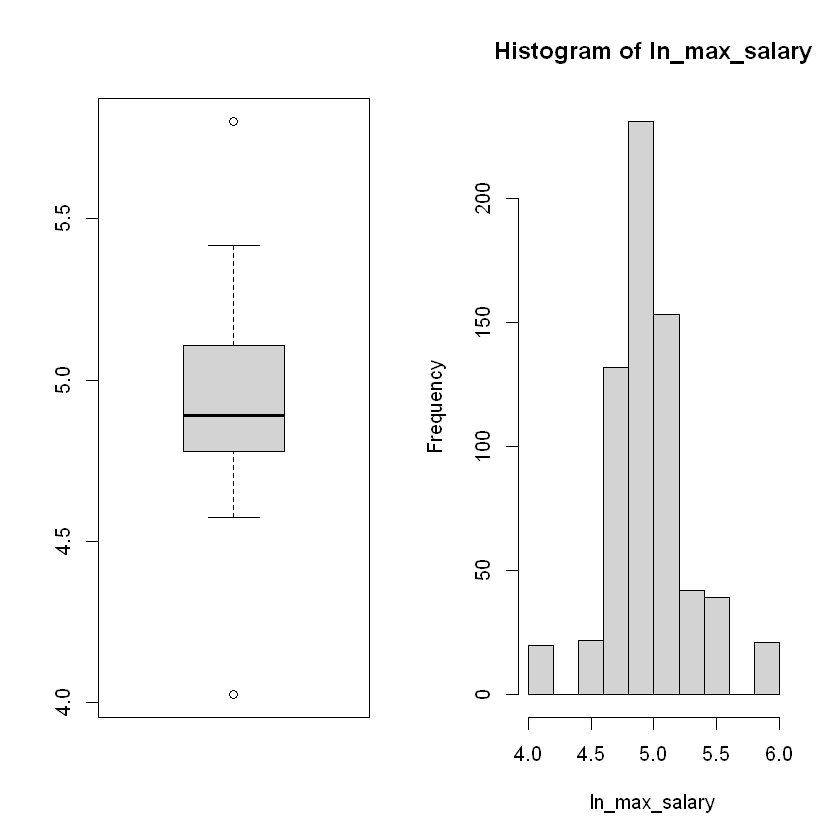

In [236]:
ln_max_salary <- log(df_new$max_salary)
par(mfrow=c(1, 2))
boxplot(ln_max_salary)
hist(ln_max_salary)

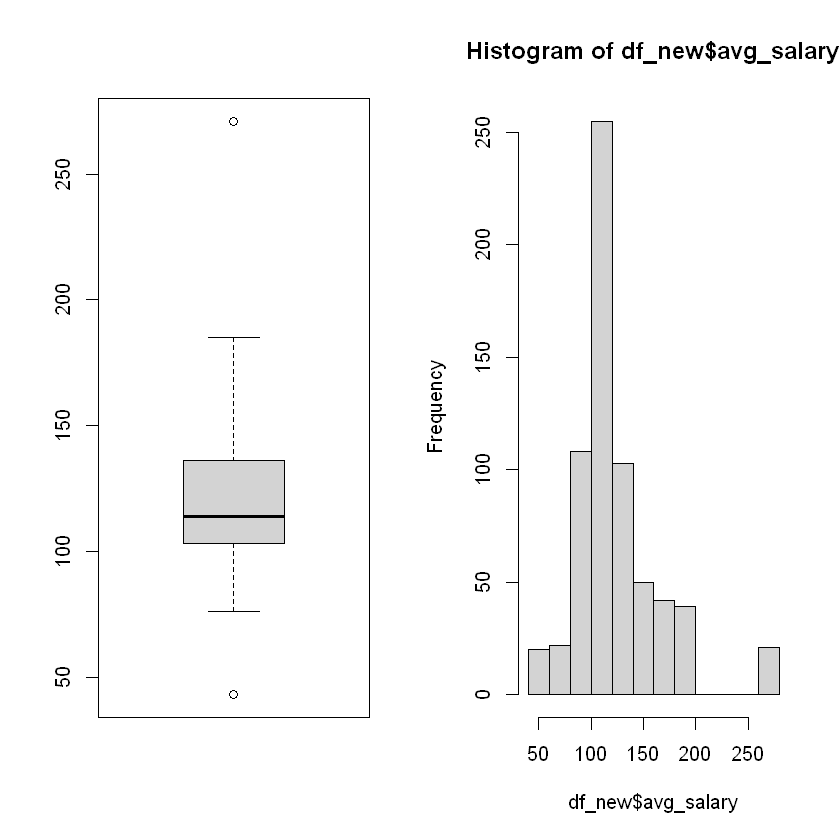

In [237]:
# Avg Salary
par(mfrow=c(1, 2))
boxplot(df_new$avg_salary)
hist(df_new$avg_salary)

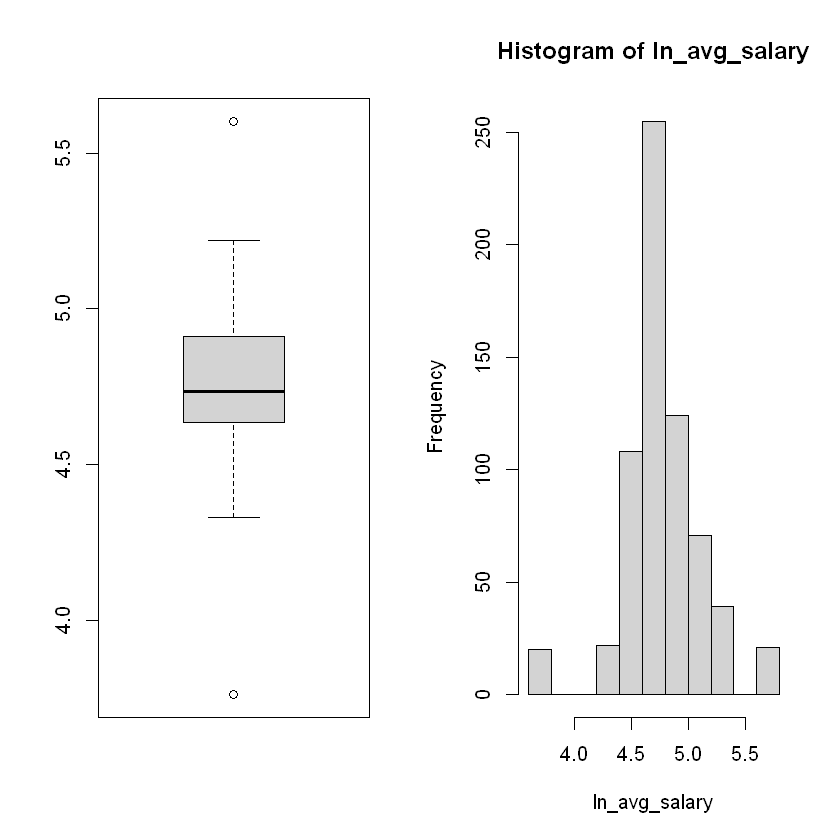

In [238]:
ln_avg_salary <- log(df_new$avg_salary)
par(mfrow=c(1, 2))
boxplot(ln_avg_salary)
hist(ln_avg_salary)

In [239]:
# Job State
state <- as.data.frame(table(df_new$job_state))
state <- state[order(state$Freq, decreasing=TRUE), ]
state

,Var1,Freq
,<fct>,<int>
3,CA,165
35,VA,89
15,MA,62
25,NY,52
16,MD,40
11,IL,30
6,DC,26
33,TX,17
36,WA,16


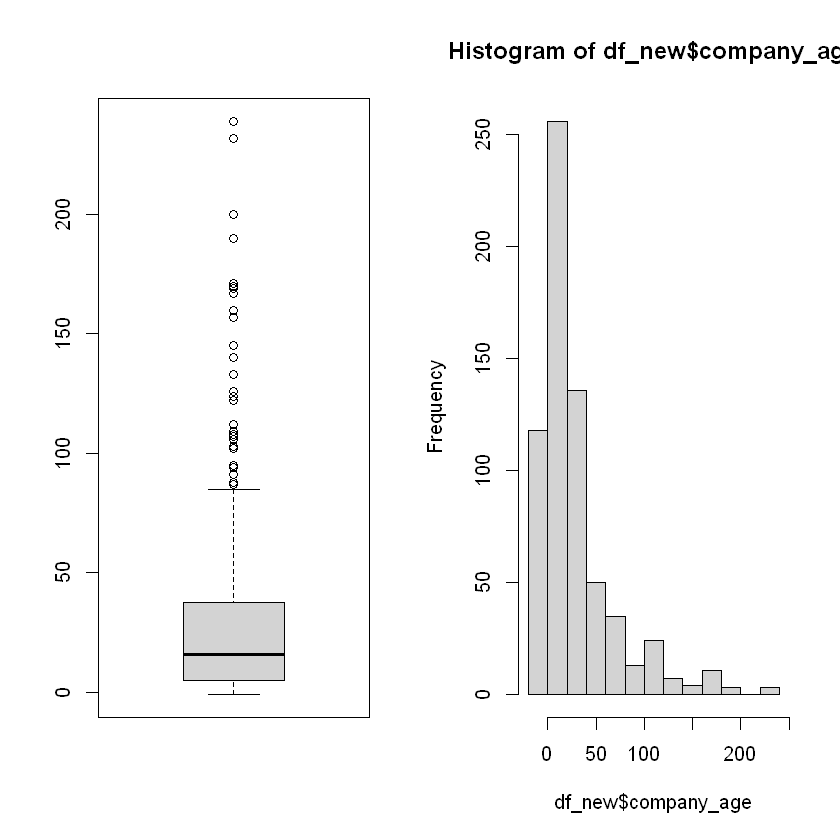

In [240]:
# Company Age
par(mfrow=c(1, 2))
boxplot(df_new$company_age)
hist(df_new$company_age)

Warning message in log(df_new$company_age):
"NaNs produced"


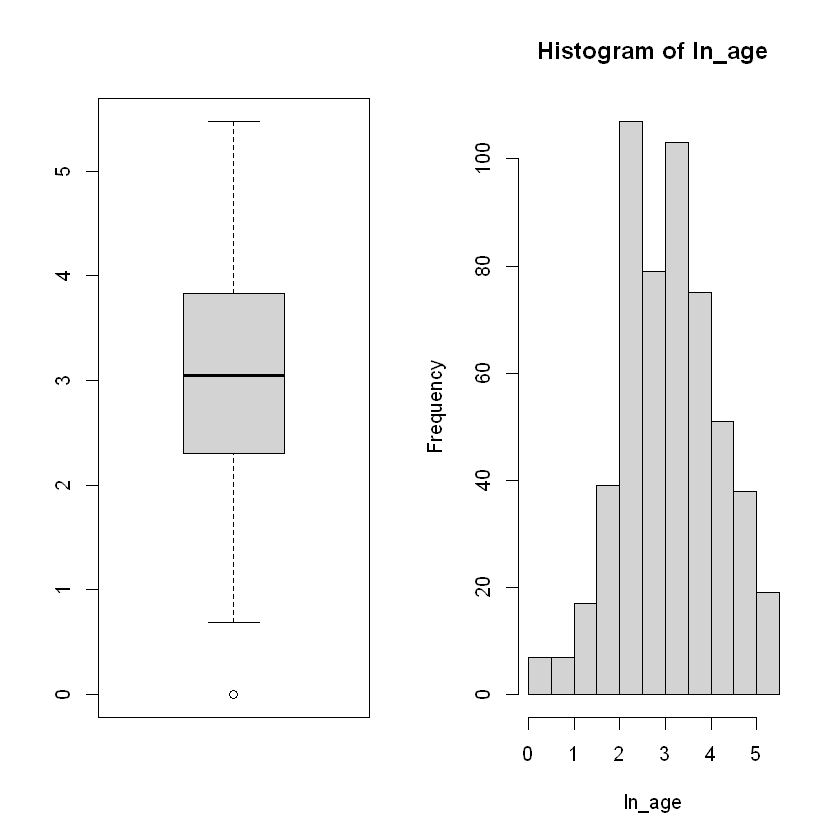

In [241]:
ln_age <- log(df_new$company_age)
par(mfrow=c(1, 2))
boxplot(ln_age)
hist(ln_age)

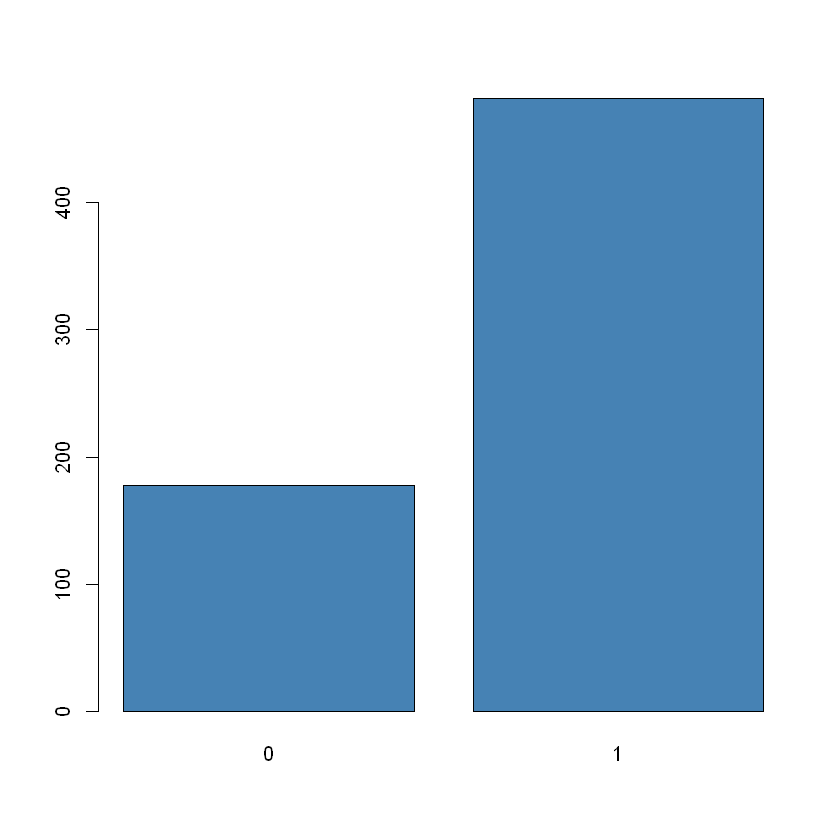

In [242]:
# Python
barplot(table(df_new$python), col="steelblue")

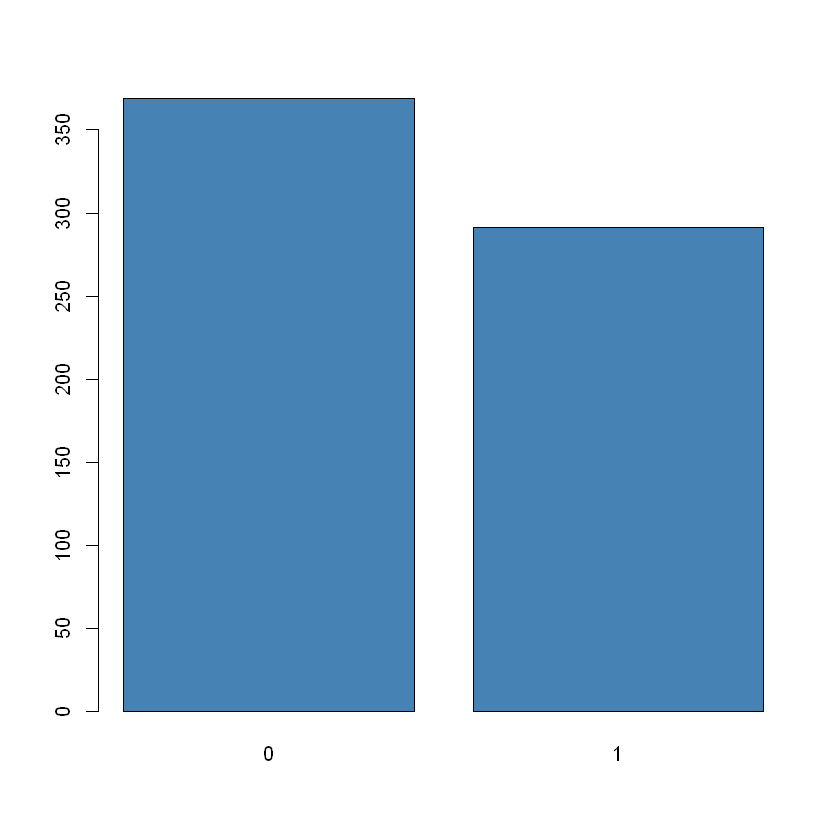

In [243]:
# Excel
barplot(table(df_new$excel), col="steelblue")

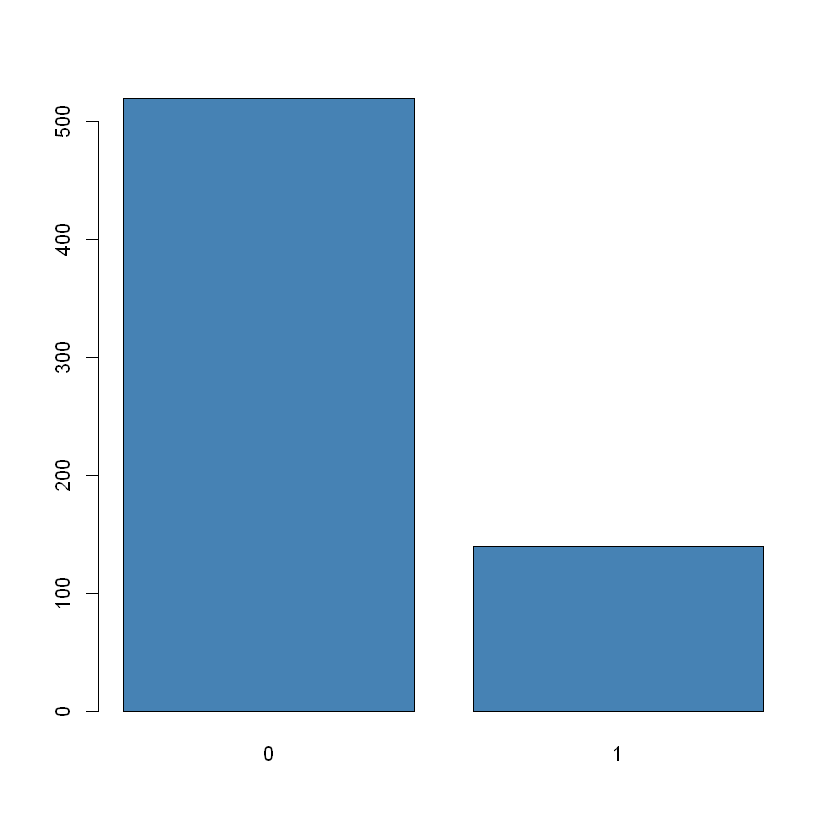

In [244]:
# Hadoop
barplot(table(df_new$hadoop), col="steelblue")

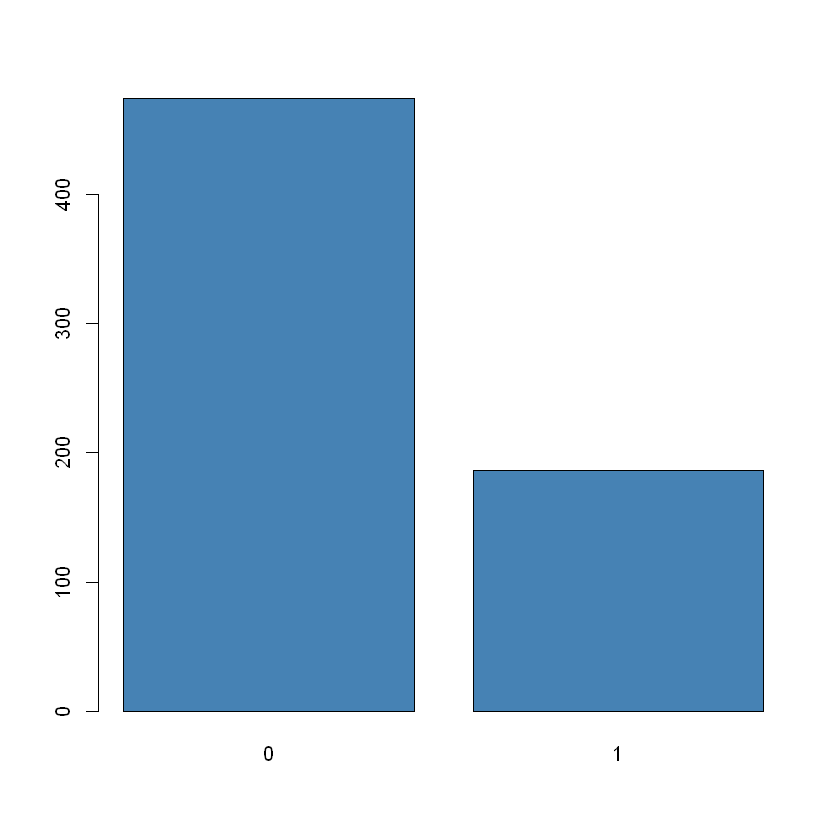

In [245]:
# Spark
barplot(table(df_new$spark), col="steelblue")

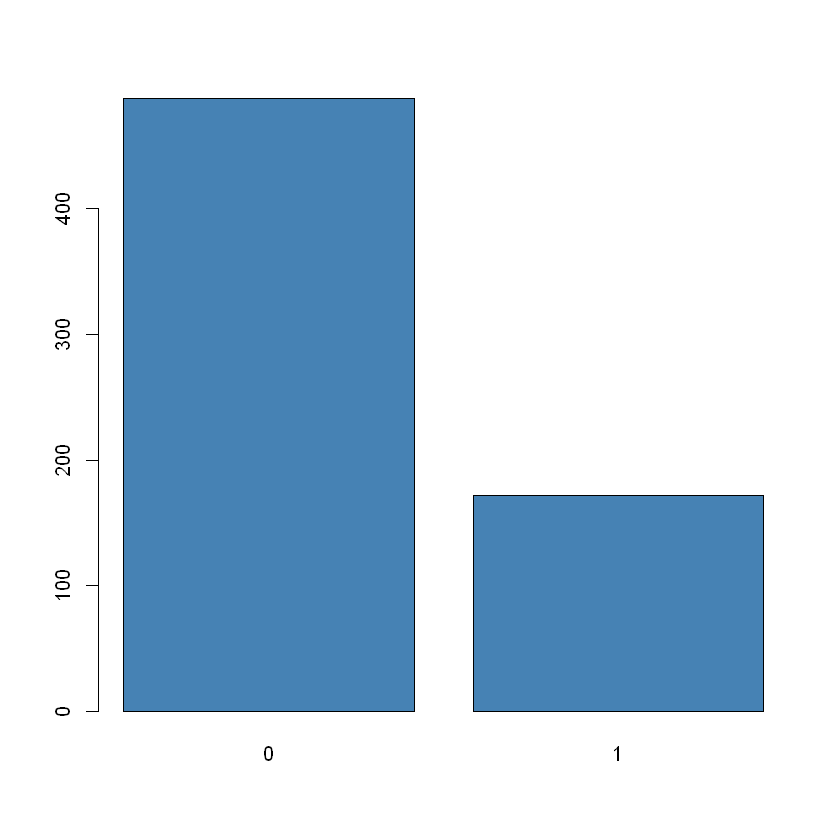

In [246]:
# AWS
barplot(table(df_new$aws), col="steelblue")

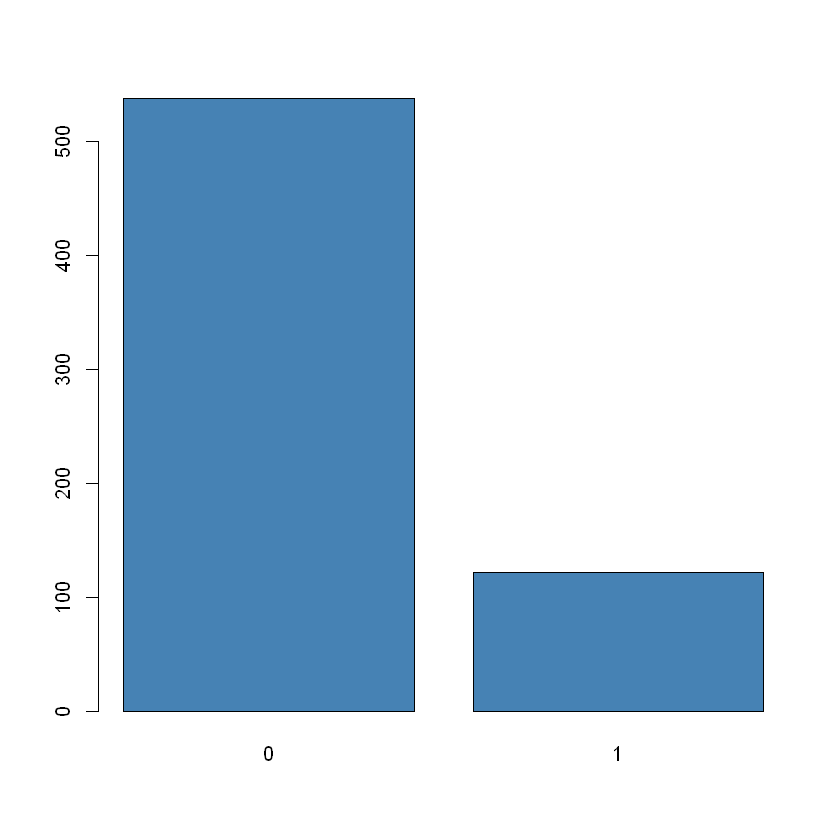

In [247]:
# Tableau
barplot(table(df_new$tableau), col="steelblue")

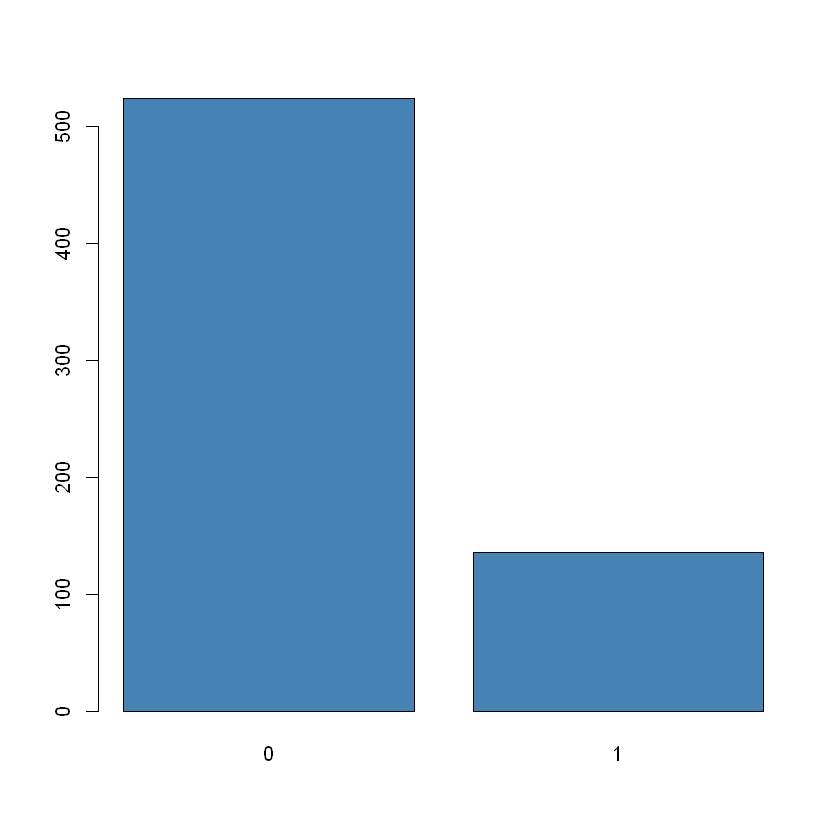

In [248]:
# Big Data
barplot(table(df_new$big_data), col="steelblue")

In [249]:
# Job Simplified
job_simp <- as.data.frame(table(df_new$job_simp))
job_simp <- job_simp[order(job_simp$Freq, decreasing=TRUE), ]
job_simp

,Var1,Freq
,<fct>,<int>
3,data scientist,447
7,na,68
1,analyst,55
2,data engineer,46
6,mle,34
5,manager,7
4,director,3


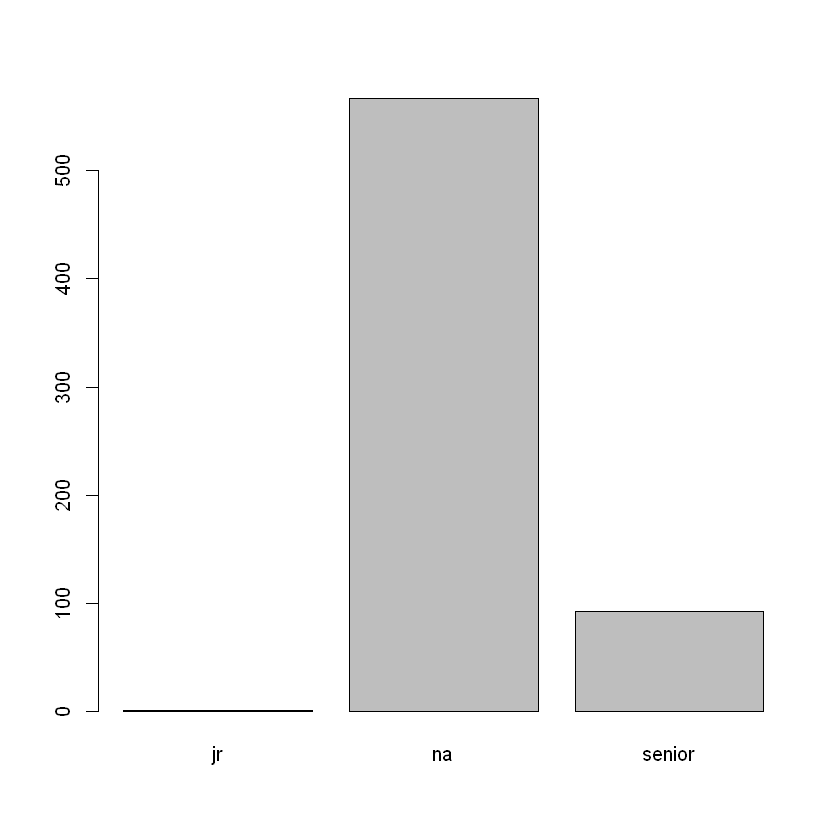

In [250]:
# Seniority
barplot(table(df_new$senior))

In [251]:
seniority <- as.data.frame(table(df_new$senior))
seniority

Var1,Freq
<fct>,<int>
jr,1
na,567
senior,92
